# Assignment 1 - Gender Detection

Task: Predict the gender of Hollywood movie character based in the dialogues in the movie. We are using https://www.kaggle.com/Cornell-University/movie-dialog-corpus dataset.  

Just imagine that you look at an animal which can be either horse or donkey, How do you differentiate between them. Our mind is trained from years of visual training to differentiate between them based on color and body type. Now imagine you read a sentence and need to identify if the speaker is male or female. How do you recognise? we humans have been listensing to millions of sentence hence can identify immediadtely with a blink of an Eye. But what we are trying to do  here is to make a computer/Machine to identify if the speaker is male or female by just a dialogue. How do we do it ?? Simple we use the advance topic such as machine learning to do so.



Lets dive deep into the topic and under stand what is Machine learning and classification means.

Before starting we need few basic understanding about the problem we are trying to solve and approach we are going to use

Since we are trying to identify whether the speaker is male or female, This kind of problem is called classification


Since we need to identify Male or female, we have only two target variable or label hence this kind of situation where we
need to find between label we call them Binary classification. Binary meaning two.

In order to solve problem we can use our experience similarly in python there are tons of libraries which would have stored
expirence which we can directly use in our program

Libraries are set of predefined modules which makes our life easy

There are various packages which we can use. Few of them we need to install using pip command 

there are multiple different IDE(interactive Development Environment) we can use so that we can rum the program

Here we are using Jupyter Notebook similar do your notebook where we can run the code and see the output immediately

First step in ML projects is to call **Libraries** (i.e. calling the predefined modules which contains functions for use by other programs) that are required for processing the given dataset.

In [1]:
# Basic Libraries:
import numpy as np # Its used for mathematical operations
import pandas as pd # Its used for data manipulation and analysis. 
import matplotlib.pyplot as plt # Its used for creating static, animated, and interactive visualizations in Python
import warnings

The above cell we are import or calling various libraries which we would understand how it will make our life easy

Once the Libraries are loaded we need to read the dataset

the dataset provided has following tables/files


- movie_titles_metadata
- movie_characters_metadata
- movie_lines
- movie_conversations

we make use of Pandas libraries for that, Basically it will allow us to see tabular data

In [2]:
# reading the dataset 
title=pd.read_csv("movie_titles_metadata.tsv")


In the Code cell above use are telling pandas to read a csv. for that we need to specify the file name 

once the dataset is read we need to see if the data is read properly so we need to use the head() function to see the top 5 rows

In [3]:
title.head()

,m0 10 things i hate about you 1999 6.90 62847 ['comedy' 'romance']
0,m1\t1492: conquest of paradise\t1992\t6.20\t10...
1,m2\t15 minutes\t2001\t6.10\t25854\t['action' '...
2,m3\t2001: a space odyssey\t1968\t8.40\t163227\...
3,m4\t48 hrs.\t1982\t6.90\t22289\t['action' 'com...
4,m5\tthe fifth element\t1997\t7.50\t133756\t['a...


From the above table you will get confused since the data is not properly ordered

what may be the reason?????

The format of data is tsv which means the data is tab separated hence we need to spilt the data accordingly

syntax of pandas for separating by tab

filename=pd.read_csv("Enter the audio path",warn_bad_lines =False,error_bad_lines=False,,sep='\t',header=None)

In [4]:
# 1. separating the dataset using the parameters sep='\t'which is tab space
# and header=None to avoid the data getting printed in heading of columns 
title=pd.read_csv("movie_titles_metadata.tsv",sep='\t',header=None)
title.head()

,0,1,2,3,4,5
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


Now you can read the data but the header is missing so we need to add them 

In [5]:
# we are giving the column/header name for the above mentioned dataset 
title.columns=['movieID','movie_title','year','IMDB rating','No. IMDB votes','genres']
title.head()

,movieID,movie_title,year,IMDB rating,No. IMDB votes,genres
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


There are lots of data which maybe useful or not, we need to use common sense and identify which are useful

By common sense we know that IMDB rating, genres and votes doesnt specify whether the dialouge is said by male or female artist

what to we do???


remove them Simple isnt it ???

In [6]:
# we are selecting the following columns for title 
title = title[['movieID','movie_title', 'year']]
title.head()

,movieID,movie_title,year
0,m0,10 things i hate about you,1999
1,m1,1492: conquest of paradise,1992
2,m2,15 minutes,2001
3,m3,2001: a space odyssey,1968
4,m4,48 hrs.,1982


By removing unwanted data we get the the useful informations like title, movieID and the year of its release 

But now your curious to know how much data we have ???

In [7]:
#we can check the size of dataset using the shape using pandas just one line of code do you believe it??
title.shape

(617, 3)

the dataset title consists of 617 rows and 4 columns

Are you curious how many movies were released each year??

we can make use of value counts function from pandas

In [8]:
# we are checking for the value count of each year
title.year.value_counts()

1999      42
2000      40
1997      38
1998      34
2001      30
1996      23
1995      21
1994      19
1989      18
1993      18
1992      18
2002      17
2003      15
1987      15
1982      14
1991      14
1988      13
2004      13
1985      11
1986      11
1984      11
1990      10
1975       9
2005       8
1979       8
1971       7
2006       6
1980       6
1983       5
1978       5
          ..
1941       2
1961       2
2009       2
1967       2
1950       2
1957       1
1969       1
1958       1
1995/I     1
2003/I     1
2009/I     1
1944       1
1936       1
2010       1
1965       1
1942       1
1996/I     1
1990/I     1
2008       1
1989/I     1
2004/I     1
2007/I     1
1946       1
1968/I     1
2005/I     1
2002/I     1
2000/I     1
1956       1
1992/I     1
1937       1
Name: year, Length: 88, dtype: int64

Lots of movies are released each year 

but are you wondering why are we checking all this ??

there is a concept of EDA 

now you may be wondering whats EDA?? right??

its called Exploratory data Analysis

dont worry we will go through the concept

In order to understand EDA we need to understand the main idea behind it 

What ever data you provide you get the result based on it 

Garbage in garbage out

We dont want that to happen hence we need clean data hence we need to remove garbage 

we remove NULL values from data so that we dont feed garbage to Model in prediction

In [10]:
# we want to remove NULL values but first we need to see how many null values are present
# we is isnull() function to find NULL and we are summing them together to see how many are present
title.year.isnull().sum()

1

we found there is only one null value 

what are we going to do ???

we remove them !!! SIMPLE isnt it ??

In [11]:
# here we are dropping the null values from the dataset and then checking for the value count
title=title.dropna()
title.year.value_counts()

1999      42
2000      40
1997      38
1998      34
2001      30
1996      23
1995      21
1994      19
1989      18
1993      18
1992      18
2002      17
2003      15
1987      15
1982      14
1991      14
1988      13
2004      13
1985      11
1986      11
1984      11
1990      10
1975       9
2005       8
1979       8
1971       7
2006       6
1980       6
1983       5
1978       5
          ..
1941       2
1961       2
2009       2
1967       2
1950       2
1957       1
1969       1
1958       1
1995/I     1
2003/I     1
2009/I     1
1944       1
1936       1
2010       1
1965       1
1942       1
1996/I     1
1990/I     1
2008       1
1989/I     1
2004/I     1
2007/I     1
1946       1
1968/I     1
2005/I     1
2002/I     1
2000/I     1
1956       1
1992/I     1
1937       1
Name: year, Length: 88, dtype: int64

Now lets check have we removed them ???

In [12]:
#using the same line of code we can check 
#there is an advance topic in python called Function where we can remove the repetition of code
#by calling fuction we will get to it 

title.year.isnull().sum()

0

Great we have removed the unwanted data this is also known as preprocessing 

Process of removing unwanted data and getting the data in a particular format is known as preprocessing 
there are various techniques lets go through them one by one

we can check the datatypes of each column using dtypes

In [13]:
title.dtypes

movieID        object
movie_title    object
year           object
dtype: object

we can see that year is in object type but that wrong

what to do now ???

simple change it 

In [14]:
# here we are converting the years to numeric 
title.year = pd.to_numeric(title.year.apply(lambda y: str(y)[0:4]), errors='coerce')


In the above code cell we are converting date to numeric 
but we need to do it for 616 rows of data 

we can do it using **for loop** but we need to write multiple lines of code
but we can make it simple using **lambda** function 



But the above code looks difficult isn't it lets make it simple

we are saying pandas that change date column to numeric using **to_numeric**

but we need to do it for all rows hence we use apply function

but where to apply ??

we are saying to all rows that string y must be changed to numeric 

simple isn't it??

** what will that do ???**
we need to see value count function 

In [15]:
title.year.value_counts()

1999    42
2000    41
1997    38
1998    37
2001    30
1996    24
1995    22
1989    19
1992    19
1994    19
1993    18
2002    18
2003    16
1987    15
1991    14
1982    14
2004    14
1988    13
1984    11
1986    11
1985    11
1990    11
2005     9
1975     9
1979     8
1971     7
2006     6
1980     6
2007     5
1983     5
        ..
1954     3
1934     3
1968     3
1953     3
1972     3
2009     3
1941     2
1933     2
1931     2
1945     2
1950     2
1940     2
1927     2
1970     2
1961     2
1967     2
1963     2
1966     2
1956     1
1937     1
2008     1
1969     1
1936     1
1965     1
1957     1
1942     1
1944     1
1958     1
1946     1
2010     1
Name: year, Length: 74, dtype: int64

In [16]:
"""1989/I     1
2004/I     1

1995/I     1
2002/I     1

2005/I     1
2009/I     1
2007/I     1
""" 
# All this are gone now

'1989/I     1\n2004/I     1\n\n1995/I     1\n2002/I     1\n\n2005/I     1\n2009/I     1\n2007/I     1\n'

In [17]:
# Lets check the shape again
title.shape

(616, 3)

After dropping the null values we have 616 rows and 4 columns in the dataset title

All we did till now is only on one table we still have 3 more left 

what to we do now??

read them also and start preprocessing them 

**Fun Fact**
70 % of time in data science lifecycle involves data cleaning and preprocessing 

dont worry we will get to Machine Learning as well

** Lets repeat**

In [18]:
# 2. # reading the dataset 2 (Movie Characters):
character=pd.read_csv("movie_characters_metadata.tsv",warn_bad_lines =False,error_bad_lines=False,sep='\t',header=None)
character.head()

,0,1,2,3,4,5
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [19]:
# we are giving the column name for the above mentioned dataset
character.columns=['characterID','character_name','movieID','movie_title','gender','credit']
character.head()

,characterID,character_name,movieID,movie_title,gender,credit
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [20]:
# displaying the shape of the datset
character.shape

(9034, 6)

the dataset character consists of 9034 rows and 6 columns available

In [21]:
# Displaying the value_count (unique values) for the dataset 
character.gender.value_counts()

?    6008
m    1899
f     921
M     145
F      44
Name: gender, dtype: int64

OMG whats happening ???
there are 5 classes in gender??
which can't be right???
what do we do now??

**Simple** lets remove *?*  since we dont know gender you cant identify machine can't either

remaining M F m f can be clubed together as 0 1

You will be wondering why are we doing it ???

Machine understand 0's and 1's better and since you know we are doing binary classification

0's and 1's got the idea???

In [22]:
# We need to clean this column. Let's also remove the characters were gender information is not available. 
character = character[character.gender != '?']
character.gender = character.gender.apply(lambda g: 0 if g in ['m', 'M'] else 1)  ## Label encoding

character.shape

(3026, 6)

In the above code we are cleaning the dataset to get male and female information and here we are using *lambda function* to convert the information to 0 as male and 1 as female with 3026 rows and 6 columns

It is similar to the function we used earlier. 

In [23]:
# Then again  checking for the unique value using value_count function
character.gender.value_counts()

0    2044
1     982
Name: gender, dtype: int64

we are getting 2044 males and 982 females available in the dataset 

Now 5 class became only two 

In [24]:
# since the are some ? (question marks) in credit column let us check the valuecount for it
character.credit.value_counts() 

1       497
2       443
3       352
?       330
4       268
5       211
6       169
7       125
8       100
9        79
10       54
11       40
1000     38
13       33
12       32
16       26
18       24
14       24
17       19
19       18
15       14
21       13
22        9
20        8
29        7
27        6
26        5
24        5
25        5
35        4
23        4
31        4
45        4
38        3
34        3
43        3
33        3
36        2
28        2
39        2
32        2
59        2
30        2
42        2
46        1
41        1
37        1
51        1
70        1
62        1
47        1
71        1
49        1
44        1
50        1
82        1
63        1
Name: credit, dtype: int64

There are 330 values missing

In [25]:
# from the above out the credit column seems to be useful and can be used so let us use .apply() to 
#iterate the dataframe using lambda function
character.credit = character.credit.apply(lambda p: '10+' if not p in ['1', '2', '3', '4', '5', '6', '7', '8', '9'] else p)  ## Label encoding
character.credit.value_counts() 

10+    782
1      497
2      443
3      352
4      268
5      211
6      169
7      125
8      100
9       79
Name: credit, dtype: int64

By applying lambda function we are getting the above results which is combined all the values that belong to 1 together and followed the same process for the entire data. 

** done with two tables two more to go **

Have patience

What to we do now **repeat**

In [26]:
# 3. reading the dataset 3 (Lines):
lines=pd.read_csv("movie_lines.tsv",warn_bad_lines =False,error_bad_lines=False,sep='\t',header=None)
lines.head()

,0,1,2,3,4
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [27]:
# we are giving the column name for the above mentioned dataset
lines.columns=['lineID','characterID','movieID','character_name','text_utterance']
lines.head()

,lineID,characterID,movieID,character_name,text_utterance
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


Now let us combine lines and character dataset together using the parameter merge of *pandas* 

In [28]:
# Now we are merging the dataset (line and character) together using the parameter merge of pandas
char_line = pd.merge(lines, character, how='inner', on=['characterID','movieID', 'character_name'])
char_line.head()

,lineID,characterID,movieID,character_name,text_utterance,movie_title,gender,credit
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4


In [29]:
# Here we are checking for the shape of the dataset
char_line.shape

(229309, 8)

Now let us remove the empty dialogues from the dataset *char_line*

In [30]:
# Now let us remove the empty dialogues from the dataset char_line
char_line = char_line[char_line['text_utterance'].notnull()]
char_line.shape

(229106, 8)

At Last we reached the final table

Lets repeat for one last time

In [31]:
# 4. reading the dataset 4 (Conversations):
Conversation=pd.read_csv("movie_conversations.tsv",sep='\t',header=None)
Conversation.head()

,0,1,2,3
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [32]:
# we are giving the column name for the above mentioned dataset
Conversation.columns=['characterID','characterID','movieID','list utterances']
Conversation.head()

,characterID,characterID,movieID,list utterances
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


Did you notice something???

this table doesnt have anything useful about conversation

**what do we do now**

Answer is simple 

**remove**

Now we have 3 Table but its useful only once we group it together

Why do we merge them will be you question??

In order to know the climate of a city we need to have knowledge about 
- geography (place)
- temperatur(math)
- history about previous climate condition(history)

Similarly all the tables(data) combine together to provide information

How to we merge them ???
using pandas again 

we make use of pd.merge function

In [33]:
char_line = pd.merge(lines, character, how='inner', on=['characterID','movieID', 'character_name'])
char_line.head()

,lineID,characterID,movieID,character_name,text_utterance,movie_title,gender,credit
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4


Here we are telling pandas to merge on basis of inner join using the key as movie ID 

What is INNER JOIN maybe a question which may raise in you mind 

Inner join is the most common type of join you’ll be working with. It returns a dataframe with only those rows that have common characteristics.

An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets

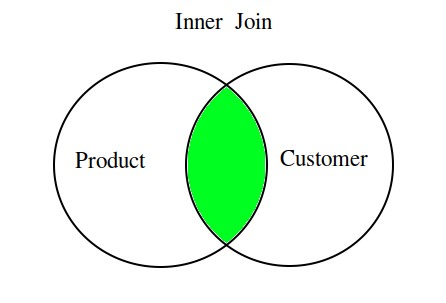

Lets check the shape of char line

In [34]:
char_line.shape

(229309, 8)

Are you curious to check if there is any NULL values??


In [37]:
char_line.text_utterance.isnull().sum()

203

there are 203 values what do we do now 

REMOVE!!!

In [39]:
char_line = char_line[char_line['text_utterance'].notnull()]
char_line.shape

(229106, 8)

we have reduced the 229309 to 229106 thats preprocessing if you remmebered

In [42]:
char_line.text_utterance.isnull().sum()

0

No NuLL Values Hurray

Lets merge one more table using same concept of innerjoin

In [43]:
# Now we are merging the dataset (merged data char_line and title) together using the parameter merge of pandas
df= pd.merge(char_line, title, how='inner', on=['movieID','movie_title'],left_index=False, right_index=False, sort=True,
         copy=False, indicator=False)
df.head()

,lineID,characterID,movieID,character_name,text_utterance,movie_title,gender,credit,year
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4,1999
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4,1999
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4,1999
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4,1999
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4,1999


In [44]:
# Here we are checking for the shape of the dataset
df.shape

(229106, 9)

Now we have 229106 rows of data with 9 columns 

--------------------------------------------------------------------------------------------------------------------------------

Once the data is prepared we need to do feature engineering 

you maybe wondering whats feature engineering means

Picking useful columns using few techniques other than common sense lets dive deep into it 

## Feature Engineering

Once we have the dataframe with us its important to extract the relevant information from the dataset. This can be achieved using:

- Remove the stopwords (This are the words which are used often which are not useful eg. is, I, the, are etc.)
- Convert all the words into smaller case words (eg. Inform ->inform)
- Lemmatization and stemming (Its an approach to produce root form of words (eg. word=["program", "programs", "programmer", "programming"]))


In [49]:
# libraries for preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

In [ ]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

To extract the information from the table we are using nltk module

You must be wondering what is nltk???

NLTK is a Python library used for human natural language processing (NLP).

Now you must be wondering what is NLP ???

Its a technique that helps machine to learn the human-made languages like English

Dont you think this might help reduce the time to perform task??


In [50]:
wordnet_lemmatizer = WordNetLemmatizer()
def clean_dialogue(text_utterance):
    """
    Function to convert a raw review to a string of words
    The input is a single string (a raw movie review), and the output is a single string (a preprocessed movie review)
    1. Remove HTML
    2. Remove non-letters
    """  
    letters_only = re.sub("[^a-zA-Z]", " ", text_utterance) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))   
    
    # 5. Use lemmatization and remove stop words
    meaningful_words = [wordnet_lemmatizer.lemmatize(w) for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space and return the result.
    return( " ".join( meaningful_words ))  
df['cleaned_dialogue'] = df['text_utterance'].apply(clean_dialogue)

In the above code cell, we are  removing non-letters (i.e. numbers and symbols) and then converting the words into lower case. Later we are removing the stop words and applying lemmatization function to use only the root forms of the word

Now you must be thinking what is root form of words???

Root words are the words that can form the basis of new words through the addition of prefixes and suffixes (eg. "program", "programs", "programmer")

There is another new word **stop words**??

This are the words which are most oftenly used which dont add value to the machine learning models (eg. I, the, are, have, etc)

In [51]:
df[['text_utterance','cleaned_dialogue']].head()

,text_utterance,cleaned_dialogue
0,They do not!,
1,I hope so.,hope
2,Let's go.,let go
3,Okay -- you're gonna need to learn how to lie.,okay gonna need learn lie
4,Like my fear of wearing pastels?,like fear wearing pastel


From the above code cell, we get the cleaned data 

In [52]:
df.head()

,lineID,characterID,movieID,character_name,text_utterance,movie_title,gender,credit,year,cleaned_dialogue
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4,1999,
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4,1999,hope
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4,1999,let go
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4,1999,okay gonna need learn lie
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4,1999,like fear wearing pastel


After we have obtained the cleaned data we have added it to the newly formed table **df** 

In [53]:
train=df.groupby(['characterID','movieID','character_name','movie_title','gender','credit','year']).\
            agg({'characterID' : ['count'], 
                 'cleaned_dialogue' : [lambda x : ' '.join(x)]})


# Renaming the columns by aggregate functions
train.columns = ["_".join(x) for x in train.columns.ravel()]
train.reset_index(inplace=True)
train.head()

,characterID,movieID,character_name,movie_title,gender,credit,year,characterID_count,cleaned_dialogue_<lambda>
0,u0,m0,BIANCA,10 things i hate about you,1,4,1999,94,hope let go okay gonna need learn lie like fe...
1,u100,m6,AMY,8mm,1,7,1999,31,died sleep three day ago paper tom dead calli...
2,u1003,m65,RICHARD,from dusk till dawn,0,3,1996,70,asked would said room room serious foolin arou...
3,u1005,m65,SETH,from dusk till dawn,0,2,1996,163,let follow said new jesus christ carlos brothe...
4,u1008,m66,C.O.,g.i. jane,0,10+,1997,33,course uh v p security arrangement generally t...


Now let us consider the columns which are helpful with detecting the gender. 

This can be done using .groupby() function followed by aggregate which gives us the numerical values for characterID and cleaned dialogues

You must be wondering what is groupby() function???

Its a pandas function which is used to split the data into group based on some criteria.

Now you must be wondering what is aggregate functions???

Its a function used to apply some aggregation across one or more column. Aggregate using string, dict, or list of string. 

Now let us check some feature distributions by gender using **data visualization**

Are you curious to know what is data visualization???


Data visualization deals with the graphic representation of data.

For data visualization let us use the seaborn module. Its data visualization library based on matplotlib. which can be installed using *pip install seaborn*. 

In [55]:
import seaborn as sns

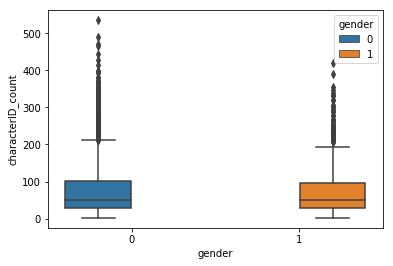

In [56]:
sns.boxplot(data = train, x = 'gender', y = 'characterID_count', hue = 'gender')

By looking at the above code cell, are you must be wondering what is **boxplot**?

Its one of the basic plot used to visualize distributions but useful when you want to compare data between two groups. Boxplot is also known as a box-and-whisker plot. The box shows the quartiles of dataset and whiskers extend to show rest of the distribution.

----------------------------------------------------------------------------------------------------------------------------

## Classification

Once we have seen how data preprocessing and data visualization works lets jump into the classification and evaluate the performance of the model. 

Firstly let us process the data to be unbiased data. For this we can split the dataset into train and test sets and also perform cross-validation.

the are going to use  train_test_split() of scikit-learn. 

Lets split the data into train_test split (train, test and validation set).

You must be curious what is **train_test split** ???

This is a subset that minimize the potential for bias in your evaluation and validation process. For that purpose, we are spliting the dataset into training set (around 70 to 90% of the data) and test set (10 to 30%) using the library **sklearn**, we use train_test_split function from sklearn.model_selection.

In [58]:
train.columns

Index(['characterID', 'movieID', 'character_name', 'movie_title', 'gender',
       'credit', 'year', 'characterID_count', 'cleaned_dialogue_<lambda>'],
      dtype='object')

In [83]:
train.shape

(2951, 9)

In [82]:
train.head()

,characterID,movieID,character_name,movie_title,gender,credit,year,characterID_count,cleaned_dialogue_<lambda>
0,u0,m0,BIANCA,10 things i hate about you,1,4,1999,94,hope let go okay gonna need learn lie like fe...
1,u100,m6,AMY,8mm,1,7,1999,31,died sleep three day ago paper tom dead calli...
2,u1003,m65,RICHARD,from dusk till dawn,0,3,1996,70,asked would said room room serious foolin arou...
3,u1005,m65,SETH,from dusk till dawn,0,2,1996,163,let follow said new jesus christ carlos brothe...
4,u1008,m66,C.O.,g.i. jane,0,10+,1997,33,course uh v p security arrangement generally t...


Here we have 2951 rows and 9 columns present in the dataset which we can use to train on the model.

In [59]:
y = train['gender']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: gender, dtype: int64

Firstly let us split the columns in dtaset to x and y where the table let us use gender in y and rest all the columns in the table x

In [60]:
x=train.copy()
x.head()

,characterID,movieID,character_name,movie_title,gender,credit,year,characterID_count,cleaned_dialogue_<lambda>
0,u0,m0,BIANCA,10 things i hate about you,1,4,1999,94,hope let go okay gonna need learn lie like fe...
1,u100,m6,AMY,8mm,1,7,1999,31,died sleep three day ago paper tom dead calli...
2,u1003,m65,RICHARD,from dusk till dawn,0,3,1996,70,asked would said room room serious foolin arou...
3,u1005,m65,SETH,from dusk till dawn,0,2,1996,163,let follow said new jesus christ carlos brothe...
4,u1008,m66,C.O.,g.i. jane,0,10+,1997,33,course uh v p security arrangement generally t...


Now from the above code cell we know that we only require credit, year, characterID_count, cleaned_dialogue and gender to find wether the dialogue was said by male or female. So let us delete all other columns using drop() function. 

In [61]:
x.drop('characterID', axis=1, inplace=True)
x.drop('movieID', axis=1, inplace=True)
x.drop('character_name', axis=1, inplace=True)
x.drop('movie_title', axis=1, inplace=True)
x.drop('gender', axis=1, inplace=True)
x.head()

,credit,year,characterID_count,cleaned_dialogue_<lambda>
0,4,1999,94,hope let go okay gonna need learn lie like fe...
1,7,1999,31,died sleep three day ago paper tom dead calli...
2,3,1996,70,asked would said room room serious foolin arou...
3,2,1996,163,let follow said new jesus christ carlos brothe...
4,10+,1997,33,course uh v p security arrangement generally t...


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 10, stratify=y)

Your dataset consists of values of both x and y. You then specify the argument test_size=0.2 which means 20% for test data and 80% for the training 

In [64]:
y_val.value_counts()

0    401
1    190
Name: gender, dtype: int64

In [65]:
x.shape

(2951, 4)

In [66]:
X_val.shape

(591, 4)

##### Pipeline for classifiers¶
Since our dataset includes both numerical features & NLP tokens, we'll use a special converter class in our pipeline.

By seeing the heading you must be wondering what is pipeline??? 

this is the process where the final estimator gets to implement fit. For example a phone where the label is the rating of the phone, ranging from 0 to 5 and this does not consists of missing values.

In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline

class Converter(BaseEstimator, TransformerMixin):
    ## Source : https://www.kaggle.com/tylersullivan/classifying-phishing-urls-three-models
    def fit(self, x, y=None):
        return self

    def transform(self, data_frame):
        return data_frame.values.ravel()

For the processing of pipeline we are classifying it into 
- Pipeline for numeric features
- Pipeline for  tokens dereived from dialogues

1. Pipeline for numeric features

In [68]:
numeric_features = ['characterID_count', 'year']

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

2. Pipeline for tokens dereived from dialogues

In [69]:
categorical_features = ['credit']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [70]:
vectorizer_features = ['cleaned_dialogue_<lambda>']
vectorizer_transformer = Pipeline(steps=[('con', Converter()),('tf', TfidfVectorizer())])

Now we have used pipelines to process the data so that we need not get errors has it contains both numerical  as well as string in the table 

You must be exicited to see the results right???

Now let us call classification models to check for the results

Some of the models that we have used here are mentioned below: 

- Logistic Regression Classifier
- Naive Bayes Classifier
- Random Forest Clasifier

There are some of the modules that can be called in our model to get the results on different models.

Like we have seen before we know that we can the modules using pip 

In the below code line we are calling the once that we are using 

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('vec', vectorizer_transformer, vectorizer_features)
    ])


In the above code cell we are calling the functions that was used in pipeline() to avoid the errors that might occur as the table contains both str, numerical values

Are you curious to know what happens in classification models??


Firstly let us fit the classifier and preprocessed pipeline to the models that we are using in the project

Are you curious to know how that happens lets see it in the below code cell

In [73]:
Logistic_clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression())])
MultinomialNB_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MultinomialNB())])
RandomForest_clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(n_estimators=120, min_samples_leaf=10, max_features=0.7, n_jobs=-1, oob_score=True))])

Now once we have fitted them let us split the data into X_train, y_train so that the splitted values can be used 
let us REPEAT the process again on all the models and see what happens

In [74]:
Logistic_clf.fit(X_train, y_train)
MultinomialNB_clf.fit(X_train, y_train)
RandomForest_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['characterID_count',
                                                   'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['credit']),
                                                 ('vec',
                                                  Pipeline(steps=[('con',
                                                                   Converter()),
                                                                  ('tf',
                      

Now to check the results we will check it on  the validation set and find out the prediction with confusion matrix

is it making you curious ???

In [75]:
def results(name: str, model: BaseEstimator) -> None:
    '''
    Custom function to check model performance on validation set
    '''
    preds = model.predict(X_val)

    print(name + " score: %.3f" % model.score(X_val, y_val))
    print(classification_report(y_val, preds))
    labels = ['Male', 'Female']

    conf_matrix = confusion_matrix(y_val, preds)
    plt.figure(figsize= (10,6))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap='Blues')
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')

we are talking about **Logistic regression** from a long time what is it actually?? 

Did that strike your mind???

Ok let us know it now!!

Logistic regression is a classification algorithm that can predict a binary outcome based on a set of independent variables

Ok, so what does this mean? A binary outcome is one where there are only two possible scenarios—either the event happens (1) or it does not happen (0).

Now let us see the results for Logistic regression

Curious??

Logistic Regression score: 0.714
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       401
           1       0.64      0.26      0.37       190

    accuracy                           0.71       591
   macro avg       0.68      0.59      0.59       591
weighted avg       0.70      0.71      0.67       591



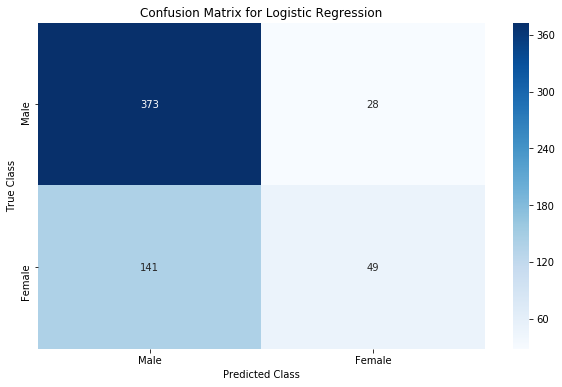

In [76]:
results("Logistic Regression" , Logistic_clf)

Now what is **Naive Bayes**??
It is probabilistic algorithm typically used for classification problems which is simple, intuitive. For example, spam filters Email app uses are built on Naive Bayes. 

To predict Y we need to use X. In other words, given a data point X=(x1,x2,…,xn), what the odd of Y being y (That is to predict whether the gender is female we need male data)

Naive Bayes score: 0.679
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       401
           1       0.00      0.00      0.00       190

    accuracy                           0.68       591
   macro avg       0.34      0.50      0.40       591
weighted avg       0.46      0.68      0.55       591



C:\Users\91789\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91789\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91789\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


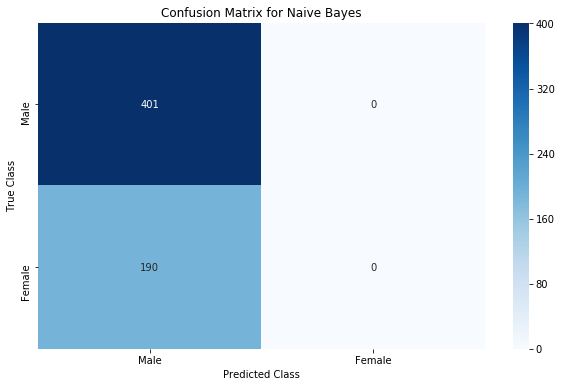

In [77]:
results("Naive Bayes" , MultinomialNB_clf)

What is **Random forest** now??

Its a supervised machine learning algorithm  which uses multiple decision trees to grows and create a “forest.” 

Random Forest score: 0.694
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       401
           1       0.56      0.22      0.31       190

    accuracy                           0.69       591
   macro avg       0.64      0.57      0.56       591
weighted avg       0.66      0.69      0.65       591



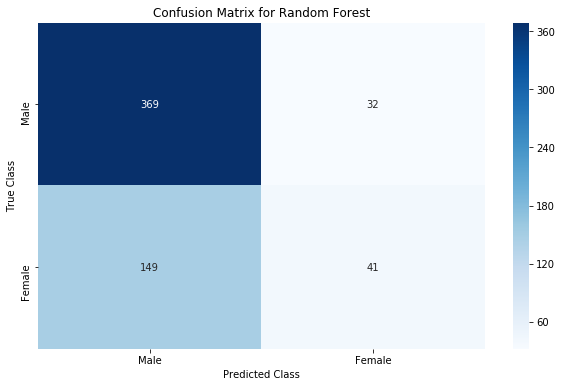

In [78]:
results("Random Forest" , RandomForest_clf)

#### Results: 

In [79]:
dict1={"Algorithm":"Logistic Regression","precision":"0.73 ","recall":" 0.93 ","f1-score":" 0.82 ","Accuracy":"0.71"}
dict2={"Algorithm":"Naive Bayes","precision":"0.68  ","recall":" 1.00 ","f1-score":"0.81 ","Accuracy":"0.68"}
dict3={"Algorithm":"Random Forest","precision":"0.70 ","recall":" 0.93 ","f1-score":" 0.80 ","Accuracy":"0.69"}
summary=pd.DataFrame([dict1,dict2,dict3])
# summary.append(dict2,ignore_index=True)
# summary.append(dict3,ignore_index=True)

In [80]:
summary

,Accuracy,Algorithm,f1-score,precision,recall
0,0.71,Logistic Regression,0.82,0.73,0.93
1,0.68,Naive Bayes,0.81,0.68,1.00
2,0.69,Random Forest,0.80,0.70,0.93


# Summary

we were provided with a data set from https://www.kaggle.com/Cornell-University/movie-dialog-corpus and told to identify if the dialogue is from a man or women. So typically its a classification problem. We are given a task to classify between male or female hence its a binary Classification problem. 

when we explored the data we found a tsv format which is tab separated which had been divided into four table namely 
- movie_titles_metadata
- movie_characters_metadata
- movie_lines
- movie_conversations

we used the jupyter notebook and python language for the purpose of classification.

we become the sherlock holmes and started our journey in building an effcient classification model.

But as we continued our journey we needed few tools we made used of pandas,numpy,sklearn,seborn which help us with our goal

First and foremost we read the data into pandas we observed the data to be messy 

we started our preprocessing by removing NULL values, bringing it into proper format

The scattered data was then merged together using inner join

once the preprocessing was done we proceeded further by featuring engineering

but we observed that the data must be further cleaned

the data was Human language hence we made use of NLP techniques for that

we removed stopwords , stemmed and lemmetised the data

once that was done we visulised the gender data using box plot which showed us the interquartile range

Once the data was cleaned the features were checked and visualised we moved further with our task 

the task at our hands was to classify between the speakers

we build a pipeline to make our work easy and reproduce the result quicker

once done with the pipeline we choose three Machine Learning Algorithm to assit us namely

- Logistic Regression Classifier
- Naive Bayes Classifier
- Random Forest Clasifier

we achieved the 71 % , 68 % and 69 % accuracy respectively

since the F1 score of Logistic Regression Classifier is 0.82 we can confidenly say that Logistic Regression Classifier performed better among the 3 machine learning algorithm in indentifying the male and female artist given a dialogue





